In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
#Rate function for a periodic nonhomogenous poisson process
def lambda_t(time, T = 3600):
    return 2 + np.sin(2 * np.pi * time/T)

## Thinning Algorithm

In [3]:

# the simulation is similar to that of the homogeneous process,
# but here we do not consider all the arriving order of the homogenous process
# but accept a few only based on the probablity condition check.

def generate_arrival_times(lambda_t, lambda_max , total_sim_time ):
    time = 0
    times = [] #stores all the time instants when an event is accepted
               #not all those arrived but just accepted

    while time < total_sim_time:

        inter_arrival_time = -np.log(np.random.rand()) / lambda_max
        time += inter_arrival_time

        if time >= total_sim_time:
            break

        u = np.random.uniform(0, 1)
        prob = lambda_t(time) / lambda_max
        if u >= prob:
            times.append(time)

    return times

In [4]:
arrivals_non_hom = generate_arrival_times(lambda_t = lambda_t, lambda_max= 3, total_sim_time=3600)
arrivals_non_hom

[1.7278939052732198,
 1.9918127338537397,
 2.27337615233536,
 2.892314419656475,
 4.531171941354175,
 4.54534900406167,
 4.695310538883232,
 5.788513399122587,
 6.033005460227232,
 6.047701921787266,
 6.823697543794461,
 7.220738924561968,
 7.3861192329935195,
 7.708969684290526,
 8.830891813707664,
 9.246475963144277,
 10.09377079437941,
 10.702231227870742,
 11.078311868028464,
 11.41382703744305,
 13.290510661942259,
 13.438791293959575,
 14.162701621113861,
 14.675248364457374,
 15.698057203188894,
 17.250889739833564,
 17.603041406218182,
 18.95961814936869,
 18.99966230307776,
 19.039660431133125,
 20.510003044777207,
 21.017437432933157,
 21.92773643352395,
 22.781662956909074,
 23.145076934604077,
 23.305213240550316,
 25.628632444001262,
 27.648104746661748,
 28.21404287909403,
 28.340521682881185,
 29.274383429101693,
 31.187839717793022,
 33.303539507306795,
 33.783402565948926,
 35.12203987298379,
 36.40103726489606,
 38.123818753196375,
 40.37781242116331,
 40.919644269858

## Accepted Arrivals Densities based on Times

C:\Users\krish\AppData\Local\Temp\ipykernel_12916\1720049524.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


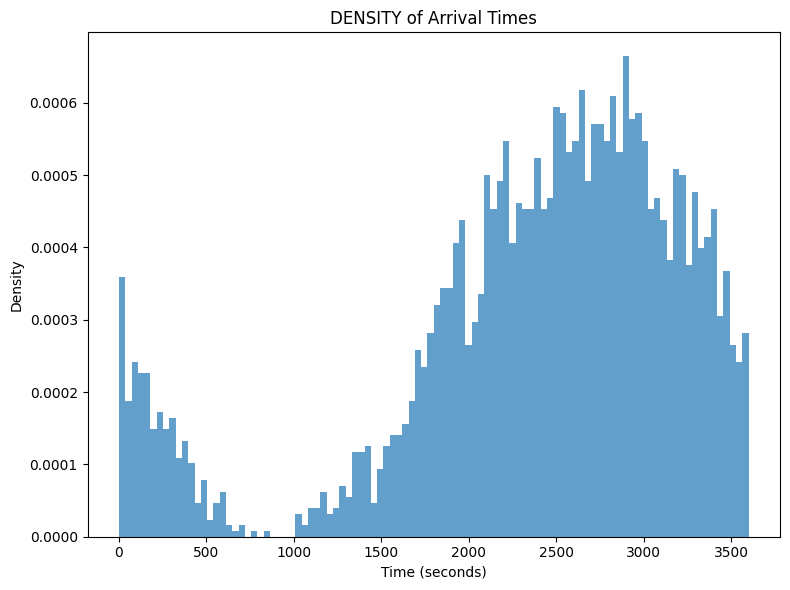

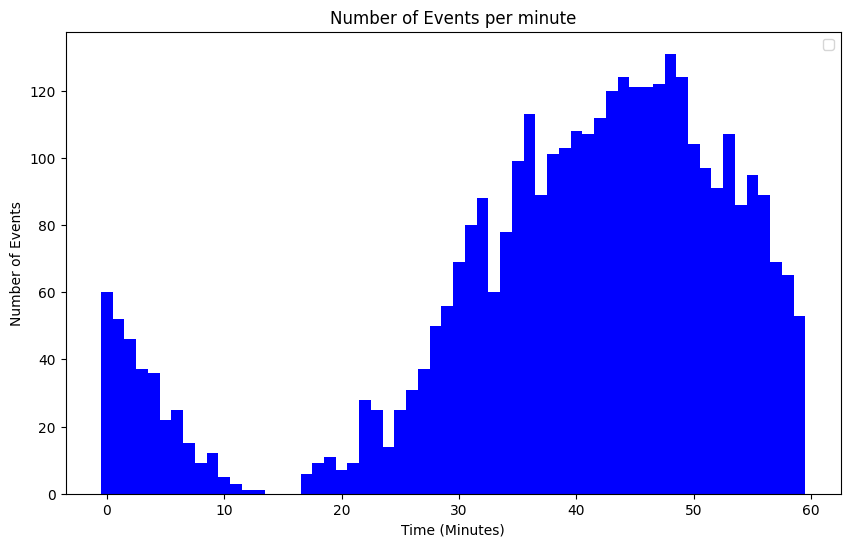

In [5]:
def plot_arrival_times_histogram(times, bins=100):
    times_hours = times
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
    ax1.hist(times_hours, bins=bins, density=True, alpha=0.7)
    ax1.set_title('DENSITY of Arrival Times')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Density')


    plt.tight_layout()

plot_arrival_times_histogram(arrivals_non_hom)


total_sim_time = 3600
time_intervals = np.arange(0, total_sim_time, 60)
event_counts_per_minute = []


for start_time in time_intervals:
    end_time = start_time + 60
    count = sum(1 for t in arrivals_non_hom if start_time <= t < end_time)
    event_counts_per_minute.append(count)


plt.figure(figsize=(10, 6))
plt.bar(time_intervals / 60, event_counts_per_minute, width=1, color='blue')
plt.title("Number of Events per minute")
plt.xlabel("Time (Minutes)")
plt.ylabel("Number of Events")
plt.legend()
plt.show()



# Accepted Arrivals at which Lambdas

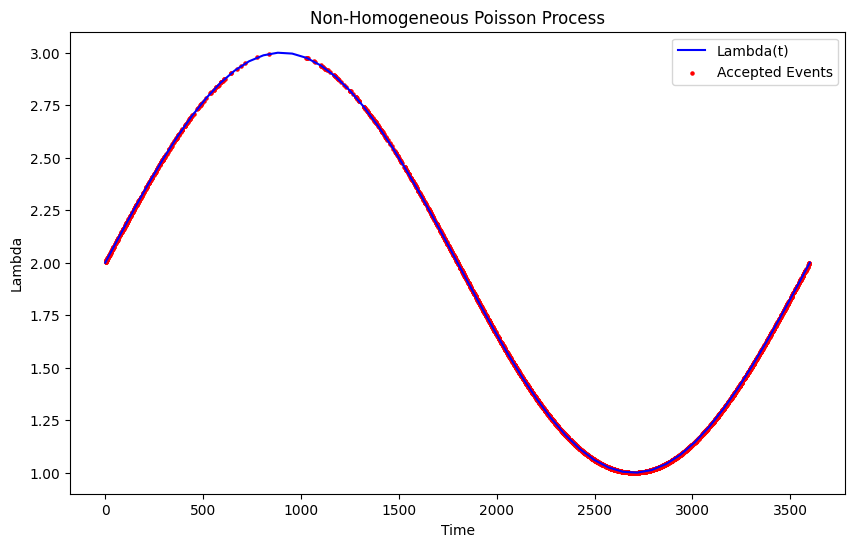

In [6]:

T=3600
t_vals = np.linspace(0,T)
lambda_vals = [lambda_t(t) for t in t_vals]

plt.figure(figsize=(10, 6))
plt.plot(t_vals, lambda_vals, label="Lambda(t)", color='blue')
plt.scatter(arrivals_non_hom, [lambda_t(t) for t in arrivals_non_hom], s=5,color='red', label="Accepted Events")
plt.xlabel("Time")
plt.ylabel("Lambda")
plt.title("Non-Homogeneous Poisson Process")
plt.legend()
plt.show()

# Applying on Orderbook

In [7]:
message_file = pd.read_csv("AAPL_2012-06-21_34200000_57600000_message_1.csv")
message_file_lo = message_file[message_file['type']==1] #limit orders
message_file_lo = message_file_lo.reset_index(drop=True)
message_file_lo

,time,type,id,size,price,dir
0,34200.004241,1,16113575,18,5853300,1
1,34200.025552,1,16120456,18,5859100,-1
2,34200.205573,1,16167159,18,5853600,1
3,34200.271740,1,3647217,20,5857300,1
4,34200.271740,1,5740544,40,5857400,-1
...,...,...,...,...,...,...
54813,57599.145155,1,287131073,55,5775500,1
54814,57599.289452,1,287143079,100,5775500,1
54815,57599.383207,1,287147169,103,5776000,1
54816,57599.383311,1,287147170,11,5776000,1


# Estimation of Lambda_t of limit orders using previous data

In [8]:
interval = 1
time_bins = np.arange(34200, 57600, interval)

event_counts = []
for start in time_bins:
    end = start + interval
    count = np.sum((message_file_lo['time'] >= start) & (message_file_lo['time'] < end))
    event_counts.append(count)

In [9]:
event_counts

[14,
 13,
 14,
 9,
 9,
 6,
 9,
 0,
 2,
 13,
 8,
 4,
 10,
 1,
 2,
 2,
 0,
 4,
 2,
 10,
 2,
 1,
 1,
 5,
 0,
 1,
 2,
 7,
 3,
 4,
 3,
 4,
 2,
 6,
 10,
 5,
 0,
 3,
 1,
 3,
 0,
 0,
 10,
 5,
 1,
 4,
 7,
 20,
 0,
 3,
 0,
 3,
 19,
 7,
 2,
 0,
 12,
 4,
 4,
 20,
 10,
 16,
 3,
 5,
 7,
 2,
 1,
 2,
 0,
 0,
 10,
 4,
 4,
 6,
 4,
 0,
 2,
 7,
 8,
 8,
 5,
 18,
 1,
 7,
 13,
 17,
 19,
 35,
 13,
 2,
 2,
 7,
 0,
 1,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 30,
 2,
 8,
 0,
 27,
 31,
 25,
 35,
 7,
 29,
 12,
 6,
 5,
 7,
 0,
 1,
 3,
 5,
 3,
 3,
 2,
 4,
 0,
 4,
 10,
 3,
 2,
 2,
 1,
 1,
 3,
 2,
 0,
 0,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 19,
 19,
 3,
 5,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 9,
 7,
 0,
 1,
 13,
 13,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 17,
 40,
 7,
 4,
 8,
 6,
 7,
 4,
 36,
 9,
 34,
 6,
 7,
 2,
 31,
 3,
 0,
 3,
 0,
 5,
 13,
 9,
 46,
 15,
 47,
 93,
 18,
 10,
 5,
 0,
 0,
 0,
 1,
 6,
 15,
 34,
 8,
 17,
 5,
 2,
 3,
 5,
 6,
 0,
 67,
 15,
 6,
 0,
 5,
 0,
 27,
 7,
 2,
 0,
 1,
 1,
 18,
 4,
 1,
 2,
 1,
 6,


# Lambda_t for limit orders

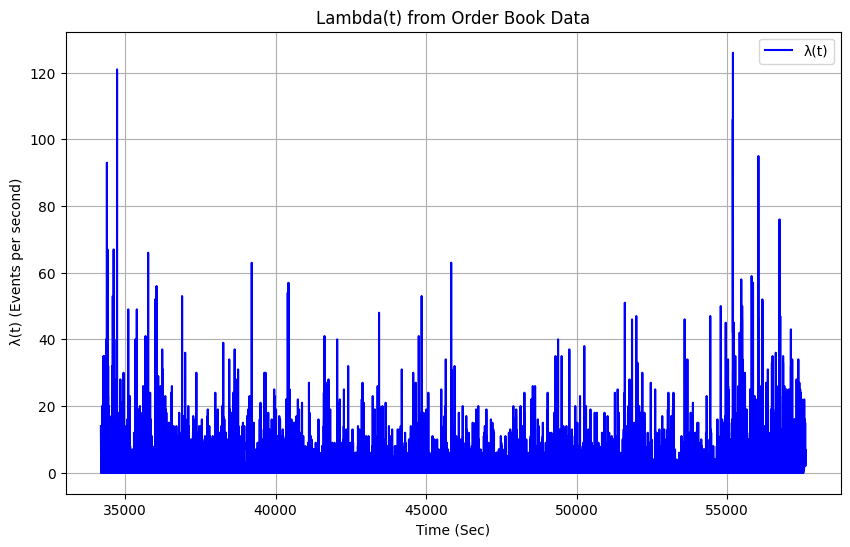

In [10]:
lambda_t = np.array(event_counts) / interval
time_bins = np.arange(34200, 57600, interval)

plt.figure(figsize=(10, 6))
plt.plot(time_bins , lambda_t, label="λ(t)", color="blue")
plt.title("Lambda(t) from Order Book Data")
plt.xlabel("Time (Sec)")
plt.ylabel(" λ(t) (Events per second)")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
lambda_max_lo = np.max(lambda_t)
print(lambda_max_lo)
print(len(lambda_t))

126.0
23400


In [12]:
time = 0
times = []
total_sim_time = 234
# took smaller timeline because every second huge data is generated, so took smaller time
# and multiplied it with 100 at the end
# this reduced 2700000 data to 27000.

while time < total_sim_time:

    inter_arrival_time = -np.log(np.random.rand()) / lambda_max_lo
    time += inter_arrival_time

    if time >= total_sim_time:
        break

    index = math.floor(time)


    u = np.random.uniform(0, 1)
    if 0 <= index < len(lambda_t):
        prob = lambda_t[index] / lambda_max_lo
        if u >= prob:
            times.append(time*100 +34200)


times

[34200.47485144493,
 34200.47702971882,
 34201.07834497017,
 34201.25673959424,
 34203.2735725718,
 34203.38565461768,
 34207.290716363896,
 34209.23482538712,
 34210.00990972943,
 34210.28887065243,
 34210.83140472302,
 34212.191339980316,
 34212.891044545955,
 34219.1801912798,
 34222.51072269148,
 34223.08639400735,
 34226.47707340754,
 34227.139871082734,
 34227.43066388191,
 34227.583257999824,
 34228.159494916,
 34229.32616804436,
 34229.915340604995,
 34231.59512960279,
 34232.042010357,
 34235.26370069537,
 34235.63460897352,
 34236.659109333625,
 34237.49731492749,
 34238.40290760407,
 34239.37328254281,
 34239.68189637146,
 34239.952623059995,
 34240.11348573949,
 34241.60102926532,
 34241.84448292441,
 34242.01964568377,
 34242.78419223099,
 34243.40291161778,
 34245.33804260405,
 34245.48597870052,
 34245.60262923962,
 34246.13473385122,
 34246.74308414057,
 34247.33046822062,
 34248.32346172718,
 34249.220801414915,
 34249.66868549987,
 34251.11830311289,
 34251.7445411586

In [13]:
len(times)

27780

# orderbook data simulated

In [14]:
data_generated = pd.DataFrame()
data_generated['time'] = times
data_generated['type'] = 'limit order'
data_generated['price'] = 0
data_generated['direction'] = 0
data_generated

,time,type,price,direction
0,34200.474851,limit order,0,0
1,34200.477030,limit order,0,0
2,34201.078345,limit order,0,0
3,34201.256740,limit order,0,0
4,34203.273573,limit order,0,0
...,...,...,...,...
27775,57595.275627,limit order,0,0
27776,57596.699394,limit order,0,0
27777,57597.297776,limit order,0,0
27778,57597.615764,limit order,0,0


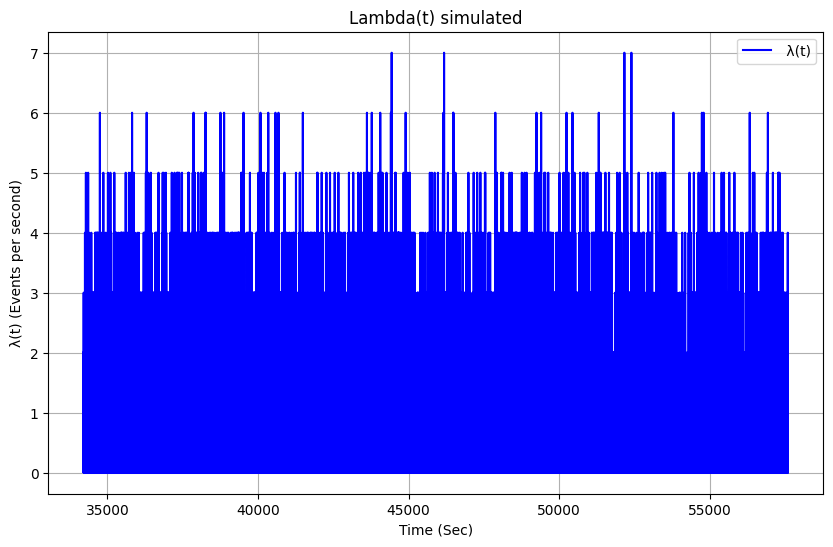

In [15]:
interval = 1
time_bins = np.arange(34200, 57600, interval)


event_counts = []
for start in time_bins:
    end = start + interval
    count = np.sum((data_generated['time'] >= start) & (data_generated['time'] < end))
    event_counts.append(count)


lambda_t = np.array(event_counts) / interval
time_bins = np.arange(34200, 57600, interval)

plt.figure(figsize=(10, 6))
plt.plot(time_bins , lambda_t, label=" λ(t)", color="blue")
plt.title("Lambda(t) simulated")
plt.xlabel("Time (Sec)")
plt.ylabel("λ(t) (Events per second)")
plt.grid(True)
plt.legend()
plt.show()


# Doing lambda calculation seperately for ask and bid for different ticks

In [16]:
message_file = pd.read_csv("AAPL_2012-06-21_34200000_57600000_message_5.csv")
message_file.columns = ["time", "type", "id" , "size" , "price" , "dir"]

In [17]:
message_file_lo = message_file[message_file['type']==1] #limit orders
message_file_lo = message_file_lo.reset_index(drop=True)
message_file_lo

,time,type,id,size,price,dir
0,34200.004261,1,16113584,18,5853200,1
1,34200.004447,1,16113594,18,5853100,1
2,34200.025552,1,16120456,18,5859100,-1
3,34200.025580,1,16120480,18,5859200,-1
4,34200.025613,1,16120503,18,5859300,-1
...,...,...,...,...,...,...
143816,57599.145155,1,287131073,55,5775500,1
143817,57599.289452,1,287143079,100,5775500,1
143818,57599.383207,1,287147169,103,5776000,1
143819,57599.383311,1,287147170,11,5776000,1


In [18]:
order_book = pd.read_csv("AAPL_2012-06-21_34200000_57600000_orderbook_5.csv")
order_book.columns = ["ap1", "as1", "bp1" , "bs1" ,"ap2", "as2", "bp2" , "bs2" ,"ap3", "as3", "bp3" , "bs3" ,"ap4", "as4", "bp4" , "bs4" ,"ap5", "as5", "bp5" , "bs5" ]


In [19]:
order_book_lo = order_book[message_file['type']==1] #limit orders
order_book_lo = order_book_lo.reset_index(drop=True)
order_book_lo

,ap1,as1,bp1,bs1,ap2,as2,bp2,bs2,ap3,as3,bp3,bs3,ap4,as4,bp4,bs4,ap5,as5,bp5,bs5
0,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,5853000,150,5868900,300,5851000,5,5869500,50,5850100,89
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,5853100,18,5868900,300,5853000,150,5869500,50,5851000,5
2,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,5853100,18,5861000,200,5853000,150,5868900,300,5851000,5
3,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,5853100,18,5859800,200,5853000,150,5861000,200,5851000,5
4,5859100,18,5853300,18,5859200,18,5853200,18,5859300,18,5853100,18,5859400,200,5853000,150,5859800,200,5851000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143816,5776700,1162,5775500,311,5776800,400,5775400,410,5776900,260,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
143817,5776700,462,5775500,111,5776800,200,5775400,410,5776900,260,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
143818,5776700,462,5776000,103,5776800,200,5775500,11,5776900,160,5775400,410,5777000,1624,5775300,1400,5777100,400,5775200,460
143819,5776700,462,5776000,114,5776800,200,5775500,11,5776900,160,5775400,410,5777000,1624,5775300,1400,5777100,400,5775200,460


In [20]:
#doing the process  for lamda(i) , i=1,2,3
#note in the following approach we will consider the size of the incoming arrival , whereas we did not consider that earlier

In [21]:
interval = 1
time_bins = np.arange(34200, 57600, interval)

length = 23400

event_counts_ask_1 = [0] * length
event_counts_ask_2 = [0] * length
event_counts_ask_3 = [0] * length
event_counts_bid_1 = [0] * length
event_counts_bid_2 = [0] * length
event_counts_bid_3 = [0] * length

for i in range(len(message_file_lo)):
    time = message_file_lo['time'][i]
    index = math.floor(time) - 34200
    if(message_file_lo['dir'][i] == 1):
        distance = order_book_lo['bp1'][i] - message_file_lo['price'][i]
        if(distance >=0 & distance < 300):
            if(distance==0):
                event_counts_bid_1[index] += message_file_lo['size'][i]
            elif(distance==100):
                event_counts_bid_2[index] += message_file_lo['size'][i]
            elif(distance==200):
                event_counts_bid_3[index] += message_file_lo['size'][i]
    if(message_file_lo['dir'][i] == -1):
        distance = -order_book_lo['ap1'][i] + message_file_lo['price'][i]
        if(distance >=0 & distance < 300):
            if(distance==0):
                event_counts_ask_1[index] += message_file_lo['size'][i]
            elif(distance==100):
                event_counts_ask_2[index] += message_file_lo['size'][i]
            elif(distance==200):
                event_counts_ask_3[index] += message_file_lo['size'][i]

## doing for ask lamda 1

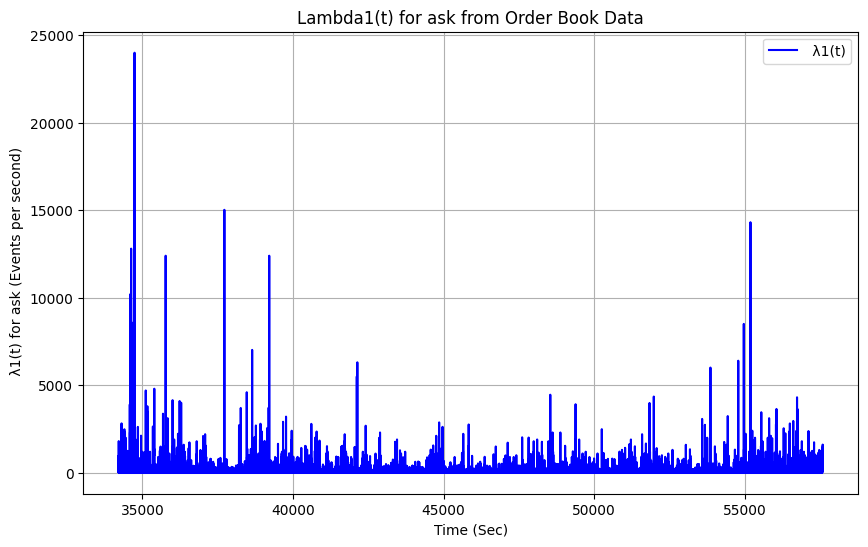

In [22]:
lambda_t = np.array(event_counts_ask_1 ) / interval
time_bins = np.arange(34200, 57600, interval)

plt.figure(figsize=(10, 6))
plt.plot(time_bins , lambda_t, label=" λ1(t)", color="blue")
plt.title("Lambda1(t) for ask from Order Book Data")
plt.xlabel("Time (Sec)")
plt.ylabel(" λ1(t) for ask (Events per second)")
plt.grid(True)
plt.legend()
plt.show()

In [23]:
lambda_max_lo = np.max(lambda_t)
print(lambda_max_lo)
print(len(lambda_t))

24000.0
23400


In [24]:
time = 0
times = []
total_sim_time = 234
# took smaller timeline because every second huge data is generated, so took smaller time
# and multiplied it with 100 at the end
# this reduced 2700000 data to 27000.

while time < total_sim_time:

    inter_arrival_time = -np.log(np.random.rand()) / lambda_max_lo
    time += inter_arrival_time

    if time >= total_sim_time:
        break

    index = math.floor(time)


    u = np.random.uniform(0, 1)
    if 0 <= index < len(lambda_t):
        prob = lambda_t[index] / lambda_max_lo
        if u >= prob:
            times.append(time*100 +34200)


In [25]:
len(times)

5547992

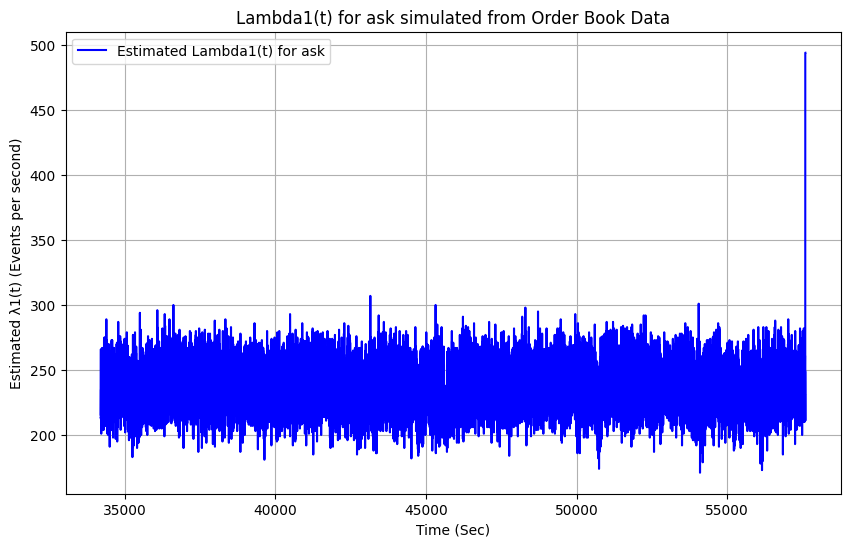

In [26]:
times= list(map(math.floor, times))
values, bins = np.histogram(times, bins=range(34200, 57600))


top_points = values

plt.figure(figsize=(10, 6))
plt.step(bins[:-1], top_points, where='mid', color='blue', label='Estimated Lambda1(t) for ask')


plt.title("Lambda1(t) for ask simulated from Order Book Data")
plt.xlabel("Time (Sec)")
plt.ylabel("Estimated λ1(t) (Events per second)")
plt.grid(True)
plt.legend()
plt.show()

## doing for ask lamda 2

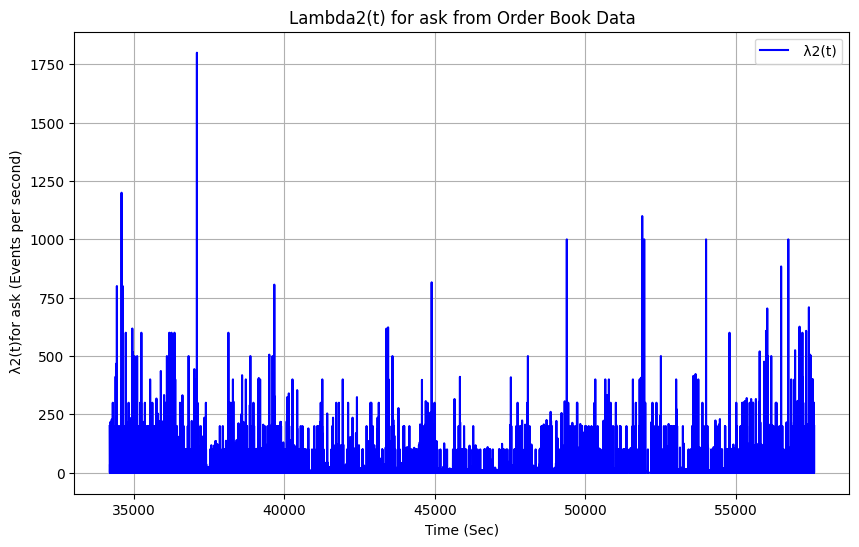

In [27]:
lambda_t = np.array(event_counts_ask_2 ) / interval
time_bins = np.arange(34200, 57600, interval)

plt.figure(figsize=(10, 6))
plt.plot(time_bins , lambda_t, label=" λ2(t)", color="blue")
plt.title("Lambda2(t) for ask from Order Book Data")
plt.xlabel("Time (Sec)")
plt.ylabel(" λ2(t)for ask (Events per second)")
plt.grid(True)
plt.legend()
plt.show()

In [28]:
lambda_max_lo = np.max(lambda_t)
print(lambda_max_lo)
print(len(lambda_t))

1800.0
23400


In [29]:
time = 0
times = []
total_sim_time = 234
# took smaller timeline because every second huge data is generated, so took smaller time
# and multiplied it with 100 at the end
# this reduced 2700000 data to 27000.

while time < total_sim_time:

    inter_arrival_time = -np.log(np.random.rand()) / lambda_max_lo
    time += inter_arrival_time

    if time >= total_sim_time:
        break

    index = math.floor(time)


    u = np.random.uniform(0, 1)
    if 0 <= index < len(lambda_t):
        prob = lambda_t[index] / lambda_max_lo
        if u >= prob:
            times.append(time*100 +34200)

In [30]:
len(times)

416075

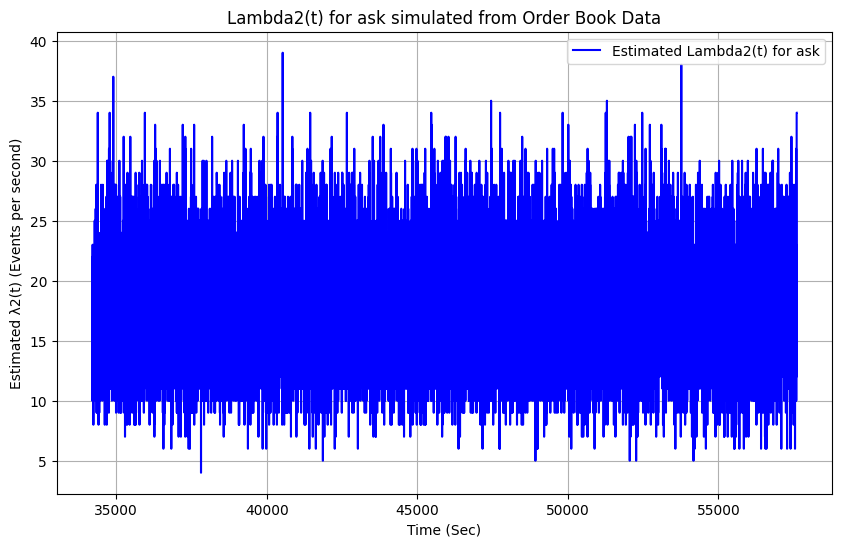

In [31]:
times= list(map(math.floor, times))
values, bins = np.histogram(times, bins=range(34200, 57600))


top_points = values

plt.figure(figsize=(10, 6))
plt.step(bins[:-1], top_points, where='mid', color='blue', label='Estimated Lambda2(t) for ask')


plt.title("Lambda2(t) for ask simulated from Order Book Data")
plt.xlabel("Time (Sec)")
plt.ylabel("Estimated λ2(t) (Events per second)")
plt.grid(True)
plt.legend()
plt.show()

# CANCELLATION RATES

In [32]:
message_file = pd.read_csv("AAPL_2012-06-21_34200000_57600000_message_5.csv")
message_file.columns = ["time", "type", "id" , "size" , "price" , "dir"]
message_file

,time,type,id,size,price,dir
0,34200.004261,1,16113584,18,5853200,1
1,34200.004447,1,16113594,18,5853100,1
2,34200.025552,1,16120456,18,5859100,-1
3,34200.025580,1,16120480,18,5859200,-1
4,34200.025613,1,16120503,18,5859300,-1
...,...,...,...,...,...,...
301581,57599.444020,4,287147169,103,5776000,1
301582,57599.444020,4,287147170,11,5776000,1
301583,57599.444020,1,287150868,48,5776100,-1
301584,57599.913118,4,287150868,48,5776100,-1


In [33]:
message_file_lo = message_file[message_file['type']==1] #limit orders
message_file_lo = message_file_lo.reset_index(drop=True)
message_file_lo

,time,type,id,size,price,dir
0,34200.004261,1,16113584,18,5853200,1
1,34200.004447,1,16113594,18,5853100,1
2,34200.025552,1,16120456,18,5859100,-1
3,34200.025580,1,16120480,18,5859200,-1
4,34200.025613,1,16120503,18,5859300,-1
...,...,...,...,...,...,...
143816,57599.145155,1,287131073,55,5775500,1
143817,57599.289452,1,287143079,100,5775500,1
143818,57599.383207,1,287147169,103,5776000,1
143819,57599.383311,1,287147170,11,5776000,1


In [34]:
message_file_ca = message_file[(message_file['type'] == 2) | (message_file['type'] == 3)] #cancellation orders
message_file_ca = message_file_ca.reset_index(drop=True)
message_file_ca

,time,type,id,size,price,dir
0,34200.201736,3,16113594,18,5853100,1
1,34200.201742,3,16113584,18,5853200,1
2,34200.201743,3,16120456,18,5859100,-1
3,34200.201768,3,16120503,18,5859300,-1
4,34200.201781,3,16120480,18,5859200,-1
...,...,...,...,...,...,...
122770,57599.223347,3,287112852,200,5776700,-1
122771,57599.223349,3,287112856,200,5776800,-1
122772,57599.348697,3,287123995,100,5776900,-1
122773,57599.383357,3,287143079,11,5775500,1


In [35]:
order_book = pd.read_csv("AAPL_2012-06-21_34200000_57600000_orderbook_5.csv")
order_book.columns = ["ap1", "as1", "bp1" , "bs1" ,"ap2", "as2", "bp2" , "bs2" ,"ap3", "as3", "bp3" , "bs3" ,"ap4", "as4", "bp4" , "bs4" ,"ap5", "as5", "bp5" , "bs5" ]


In [36]:
order_book_lo = order_book[message_file['type']==1]   #limit orders
order_book_lo = order_book_lo.reset_index(drop=True)
order_book_lo

,ap1,as1,bp1,bs1,ap2,as2,bp2,bs2,ap3,as3,bp3,bs3,ap4,as4,bp4,bs4,ap5,as5,bp5,bs5
0,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,5853000,150,5868900,300,5851000,5,5869500,50,5850100,89
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,5853100,18,5868900,300,5853000,150,5869500,50,5851000,5
2,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,5853100,18,5861000,200,5853000,150,5868900,300,5851000,5
3,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,5853100,18,5859800,200,5853000,150,5861000,200,5851000,5
4,5859100,18,5853300,18,5859200,18,5853200,18,5859300,18,5853100,18,5859400,200,5853000,150,5859800,200,5851000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143816,5776700,1162,5775500,311,5776800,400,5775400,410,5776900,260,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
143817,5776700,462,5775500,111,5776800,200,5775400,410,5776900,260,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
143818,5776700,462,5776000,103,5776800,200,5775500,11,5776900,160,5775400,410,5777000,1624,5775300,1400,5777100,400,5775200,460
143819,5776700,462,5776000,114,5776800,200,5775500,11,5776900,160,5775400,410,5777000,1624,5775300,1400,5777100,400,5775200,460


In [37]:
order_book_ca = order_book[(message_file['type'] == 2) | (message_file['type'] == 3)] #limit orders
order_book_ca = order_book_ca.reset_index(drop=True)
order_book_ca

,ap1,as1,bp1,bs1,ap2,as2,bp2,bs2,ap3,as3,bp3,bs3,ap4,as4,bp4,bs4,ap5,as5,bp5,bs5
0,5859100,18,5853300,18,5859200,18,5853200,18,5859300,118,5853000,150,5859400,200,5851000,5,5859800,200,5850100,89
1,5859100,18,5853300,18,5859200,18,5853000,150,5859300,118,5851000,5,5859400,200,5850100,89,5859800,200,5850000,100
2,5859200,18,5853300,18,5859300,118,5853000,150,5859400,200,5851000,5,5859800,200,5850100,89,5861000,200,5850000,100
3,5859200,18,5853300,18,5859300,100,5853000,150,5859400,200,5851000,5,5859800,200,5850100,89,5861000,200,5850000,100
4,5859300,100,5853300,18,5859400,200,5853000,150,5859800,200,5851000,5,5861000,200,5850100,89,5868900,300,5850000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122770,5776700,462,5775500,11,5776800,400,5775400,410,5776900,260,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
122771,5776700,462,5775500,11,5776800,200,5775400,410,5776900,260,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
122772,5776700,462,5775500,111,5776800,200,5775400,410,5776900,160,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
122773,5776700,462,5776000,114,5776800,200,5775400,410,5776900,160,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500


In [38]:

T = 57600 - 34200                  #in seconds
M = len(order_book)
Sl  = message_file_lo['size'].mean()
Sc = message_file_ca['size'].mean()

Nc = [0]*5

In [39]:
for i in range(len(message_file_ca)):
    if(message_file_ca['dir'][i] == 1):
        distance = order_book_ca['ap1'][i] - message_file_ca['price'][i]
        if(distance >=100 & distance <= 500):
            if(distance==100):
                Nc[0] += 1
            elif(distance==200):
                Nc[1]  += 1
            elif(distance==300):
                Nc[2]  += 1
            elif(distance==400):
                Nc[3]  += 1
            elif(distance==500):
                Nc[4]  += 1
    if(message_file_ca['dir'][i] == -1):
        distance = -order_book_ca['bp1'][i] + message_file_ca['price'][i]
        if(distance >=100 & distance <= 500):
            if(distance==100):
                Nc[0] += 1
            elif(distance==200):
                Nc[1]  += 1
            elif(distance==300):
                Nc[2]  += 1
            elif(distance==400):
                Nc[3]  += 1
            elif(distance==500):
                Nc[4]  += 1

In [40]:
Nc

[138, 359, 616, 735, 919]

In [41]:
message_file

,time,type,id,size,price,dir
0,34200.004261,1,16113584,18,5853200,1
1,34200.004447,1,16113594,18,5853100,1
2,34200.025552,1,16120456,18,5859100,-1
3,34200.025580,1,16120480,18,5859200,-1
4,34200.025613,1,16120503,18,5859300,-1
...,...,...,...,...,...,...
301581,57599.444020,4,287147169,103,5776000,1
301582,57599.444020,4,287147170,11,5776000,1
301583,57599.444020,1,287150868,48,5776100,-1
301584,57599.913118,4,287150868,48,5776100,-1


In [42]:
order_book

,ap1,as1,bp1,bs1,ap2,as2,bp2,bs2,ap3,as3,bp3,bs3,ap4,as4,bp4,bs4,ap5,as5,bp5,bs5
0,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,5853000,150,5868900,300,5851000,5,5869500,50,5850100,89
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,5853100,18,5868900,300,5853000,150,5869500,50,5851000,5
2,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,5853100,18,5861000,200,5853000,150,5868900,300,5851000,5
3,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,5853100,18,5859800,200,5853000,150,5861000,200,5851000,5
4,5859100,18,5853300,18,5859200,18,5853200,18,5859300,18,5853100,18,5859400,200,5853000,150,5859800,200,5851000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301581,5776700,300,5776000,11,5776800,200,5775400,410,5776900,160,5775300,1400,5777000,1624,5775200,460,5777100,400,5775100,500
301582,5776700,300,5775400,410,5776800,200,5775300,1400,5776900,160,5775200,460,5777000,1624,5775100,500,5777100,400,5775000,2755
301583,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,5775200,460,5776900,160,5775100,500,5777000,1624,5775000,2755
301584,5776700,300,5775400,410,5776800,200,5775300,1400,5776900,160,5775200,460,5777000,1624,5775100,500,5777100,400,5775000,2755


In [43]:
Qi_B = [0]*5
Qi_A = [0]*5


for i in range(len(message_file)-1):
    price_up = order_book['ap1'][i]
    price_down = order_book['bp1'][i]


    distance = price_up - order_book['bp1'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_B[distance-1]+= order_book['bs1'][i]

    distance = price_up - order_book['bp2'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_B[distance - 1]+=order_book['bs2'][i]

    distance = price_up - order_book['bp3'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_B[distance - 1]+=order_book['bs3'][i]

    distance = price_up - order_book['bp4'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_B[distance - 1]+=order_book['bs4'][i]

    distance = price_up - order_book['bp5'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_B[distance - 1]+=order_book['bs5'][i]


    distance = -price_down + order_book['ap1'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_A[distance - 1]+= order_book['as1'][i]

    distance = -price_down + order_book['ap2'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_A[distance - 1]+= order_book['as2'][i]

    distance = -price_down + order_book['ap3'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_A[distance - 1]+= order_book['as3'][i]

    distance = -price_down + order_book['ap4'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_A[distance - 1]+= order_book['as4'][i]

    distance = -price_down + order_book['ap5'][i]
    if(distance >=100 and distance <= 500):
      distance/=100
      distance = int(distance)
      Qi_A[distance - 1]+= order_book['as5'][i]

In [44]:
for i in range(0, 5):
   Qi_A[i]/= (M*Sl)
   Qi_B[i]/= (M*Sl)

Qa = np.array(Qi_A)
Qb = np.array(Qi_B)

Qi = (Qa+ Qb)/2

Theta = (Nc/(Qi*T) )*(Sc/Sl)
Theta.tolist()
Theta_i = [round(num, 2) for num in Theta]
print("Theta i :" ,Theta_i)

Theta i : [0.51, 0.42, 0.48, 0.41, 0.32]
